<font size=8> Quantum circuits </font>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import qiskit
%config InlineBackend.figure_format="svg"

# Keywords
## 4.2 Single qubit operations
1. commonly used gates:
    1. Pauli X (Not), Y, Z gates.
    2. the Hdamard gate (H), the phase gate (S), the $\pi/8$ gate (T).
    3. Rotation operators. (exponential form / trigonometric function form)
2. useful theorems and properites:
    1. Rotation in Blosh sphere.
    2. Z-Y / Z-X decomposition of unitary operators; corollary (phase * AXBXC with ABC=1).
    3. circuit identites H(X,Y,Z)H.

## 4.3 Controlled operations
1. contolled operation: control bit, target bit.
2. Implementation of contolled-U through decomposition.
3. conditioning on multile qubits.
4. Variations: zero contol bit; multiple target bits.

## 4.4 Measurements
1. Principle of deferred measurement.
2. Principle of implicit measurement.

## 4.5 Universal quantum gates
1. Two-level unitary gates are universal.
2. Single qubit and CNOT gates are universal: Gray code.
3. A discrete set of universal operations:
    1. Approximating unitary operators: error $E(U,V)$, error in measurement probability, "chain rule".
    2. the standard set: Hadaramrd, phase, CNOT, $\pi/8$ gates: (patching $2\pi$ and sandwich of $H$); Solovay-Kitaev theorem.
    3. Other universal gates: Hadarmard, phase, CNOT, Toffoli.
    4. Difficulty of approximating unitary gates.
4. Quantum computational complexity: $BQP$ (bounded probability error, P size quantum circuits), $BPP\subseteq BQP \subseteq PSPACE$.

## 4.7 Simulation of quantum systems
Short-time simulation of the evlution operator; "local" decomposition of the Hamiltonian; Trotter decomposition.


# Solution

## 4.2
**Excercise 4.1**: In Exercise 2.11, which you should do now if you haven’t already done it, you computed the eigenvectors of the Pauli matrices. Find the points on the Bloch sphere which correspond to the normalized eigenvectors of the different Pauli matrices.

*Solution.* The intersection of x,y,z axes and the sphere.

<br/>

**Excercise 4.2**: Let x be a real number and A a matrix such that $A^2 = I$. Show that $$\exp(iAx)=\cos(x)I+i\sin(x)A.$$ Use this result to verify Equations (4.4) through (4.6).

*Solution.* Since $A^2=I$, $A^{2n}=I$ for all $n\in \mathbb{Z}_+$. Using the definition of the exponential, we get:
$$\begin{aligned}
LHS=\exp(iAx)&=\sum_{k=0}^{\infty} \frac{1}{k!}(iAx)^k = \sum_{n=0}^{\infty} \left[\frac{1}{(2n)!} (iAx)^{2n}+\frac{1}{(2n+1)!} (iAx)^{2n+1}\right]\\
&=\sum_{n=0}^{\infty} \frac{(-1)^n}{(2n)!}x^{2n}I + i\sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!}x^{2n+1}A=RHS,
\end{aligned}$$
where the last equality is due to the definition of sin and cos. The verification is trivial.

<br/>

**Excercise 4.6**: (Bloch sphere interpretation of rotations) One reason why the $R_{\hat{n}}(\theta)$ operators are referred to as rotation operators is the following fact, which you are to prove. Suppose a single qubit has a state represented by the Bloch vector $\vec{\lambda}$. Then the effect of the rotation $R_{\hat{n}}(\theta)$ on the state is to rotate it by an angle $\theta$ about the $n$ axis of the Bloch sphere. This fact explains the rather mysterious looking factor of two in the definition of the rotation matrices.

*Solution.* A detailed proof is omitted here. The idea is to choose the the state vector corresponding to $\vec{\lambda}$ and $-\vec{\lambda}$ as basis, and reduce the rotation to a rotation about the z axis.
<!-- Boloch sphere representation reads $|\psi\rangle = (\cos{\frac{\theta}{2}}) |0\rangle + (e^{i\phi}\sin{\frac{\theta}{2}})|1\rangle$.  -->

<br/>

**Excercise 4.8**: An arbitrary single qubit unitary operator can be written in the form $U = \exp(i\alpha)R_{\hat{n}}(\theta)$ for some real numbers $\alpha$ and $\theta$, and a real three-dimensional unit vector $\hat{n}$.
1. Prove this fact.
2. Find the values of $\alpha$, $\hat{n}$ and $\theta$ for the Hadamard gate and the phase gate.

*Solution.*
1. This problem is actually esbalishing the relationship between the group $U(2)$ and $SO(3)$. It is well known that there is a homomorphism between $SU(2)$ and $SO(3)$. For an elment $u$ in $U(2)$, since $uu^{\dagger}=1$, there is $|\det(u)|^2=1$. Therefore, given a unitary operator $u$, first find its determinant $\det(u)=e^{2\alpha}$, then $e^{-\alpha}u$ has derterminant 1, and is thus an element of $SU(2). One can then find a rotation $R_{\hat{n}}(\theta)$ corresponding to it, then $u=e^{i\alpha}R_{\hat{n}}(\theta)$. Actually theorem 4.1 gives such an decomposition through Euler angles.
2. Yet to be done.

<br/>

**Exercise 4.12**: Give A, B, C, and $\alpha$ for the Hadamard gate. ($H=e^{i\alpha}AXBXC$).

*Solution*. In the Z-Y decomposition of the Hadamard gate, it is evident that $\alpha=\pi/2$, $\beta=0$, $\delta=\pi$, $\gamma=\pi/2$. The decomposition into ABC then follows trivially.

<br/>

**Exercise 4.15: (Composition of single qubit operations)** (Figuring out the overall rotation axis and angle of the composition of two rotations).

*Solution.* Use the $R_{\hat{n}}=c-is(\hat{n}\cdot\vec{\sigma})$. The calculation is omitted here. Note that the $\exp(A)\exp(B)\neq \exp(A+B)$ for operators (unless $[A,B]=0$)! (See the BCH formula).


## 4.3
**Exercise 4.17**: (Building from controlled-Z gates) Construct a gate from one controlled-Z gate and two Hadamard gates, specifying the control and target qubits.

*Solution*. Since CNOT is actually the CX gate, and $HZH=X$ and $H^2=I$, so CX can be constructed by a Z gate sandwiched by two H gates.

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


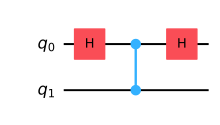

In [5]:
from qiskit.quantum_info.operators import Operator
cx = qiskit.QuantumCircuit(2)
cx.h(0)
cx.cz(1, 0)
cx.h(0)
print(Operator(cx))
cx.draw("mpl")

**Excercise 4.18** *Solution.* CZ is dianogal, and thus symmetric.

<br/>

**Excercise 4.19 (CNOT action on density matrices)** The CNOT gate is a simple permutation whose action on a density matrix $\rho$ is to rearrange the elements in the matrix. Write out this action explicitly in the computational basis.

*Solution.* The evolution of $\rho$ under CNOT is given by $CNOT\;\rho\;CNOT^{\dagger}$. Multiplying CNOT (real and symmetric) on the right exchanges the 3rd and 4th rows of $\rho$, and multiplying it on the right exchanges the 3rd and 4th columns.

<br/>

**Excercise 4.20 (CNOT basis transformations)** *Solution.* I will only show the circuit identity here. (Note that the bit ordering of qiskit and text book seems to be different).

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


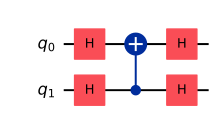

In [6]:
from qiskit.quantum_info.operators import Operator
filpped_cx = qiskit.QuantumCircuit(2)
filpped_cx.h(0)
filpped_cx.h(1)
filpped_cx.cx(1, 0)
filpped_cx.h(0)
filpped_cx.h(1)
print(Operator(filpped_cx))
filpped_cx.draw("mpl")

**Exercise 4.21**: Verify that Figure 4.8 implements the C2(U) operation.

*Solution.* If the two control bits are both 1, then the two V, i.e., $V^2=U$ will be acted on the target bit. If the two control bits are both zero, nothing will be acted on the target bit. If one control bit is 1, and the other is 0, $VV^{\dagger}=1$ or $V{\dagger}V=1$ will be acted.

<br/>

**Exercise 4.23**: Construct a $C^1(U)$ gate for $U = R_x(\theta)$ and $U = R_y(\theta)$, using only CNOT and single qubit gates. Can you reduce the number of single qubit gates needed in the construction from three to two?

*Solution*. The problem of implementing controlled gates reduces to finding the decomposition of gates.
For the $R_y$ case, the Z-Y decomposition is trivial, with $\alpha=\beta=\delta=0$ and $\gamma=\theta$. Then $A=R_y(\theta/2)$, $B=R_y(-\theta/2)$, and $C=1$. Thus, only two on-bit gate $A$ and $B$ is necessary.  
For the $R_x$ case. Using theorem 4.1, it is evident that $\alpha=\pi$, $\beta=3\pi/2$, $\gamma=\theta$, $\delta=\pi/2$. Then utilizing the corollary, $A=R_z(3\pi/2)R_y(\theta/2)$, $B=R_y(-\theta/2)R_z(-\pi/2)$, $C=R_z(-\pi/2)$. Then we can implement $R_x$ using A,B,C,X and a phase gate. However, this decomposition is cumbersome. A better way is to use Z-X decomposition, and derive a corollary analogous to corolloary 4.2, so that only 2 one-bit gates are necessary, just like the $R_y$ case.

<br/>

**Excercise 4.28-4.30** Based on some discussion on the Internet, these problems seem **Impossible** if one can only use $V^2=U$ and some other common gates! This result has been **proven** if the problems aren't misunderstood (see for example 4.28 in this [collection of solutions](https://rainij.github.io/solutions-qcqi-nielsen-chuang/index.html) and this [post](https://cs.stackexchange.com/questions/80538/is-it-possible-to-construct-a-c5u-with-v2-u-and-no-work-qubits-nielsen-ch/138853#138853)). If one can use a higher degree root $V^d = U$, this may be possible: https://arxiv.org/abs/0708.3274.

## 4.4
**Excercise 4.32**: Suppose $\rho$ is the density matrix describing a two qubit system. Suppose we perform a projective measurement in the computational basis of the second qubit. Let $P_0 = |0\rangle\langle0|$ and $P_1 = |1\rangle\langle1|$ be the projectors onto the $|0\rangle$ and $|1\rangle$ states of the second qubit, respectively. Let $\rho'$ be the density matrix which would be assigned to the system after the measurement by an observer who did not learn the measurement result. Show that $$\rho'=P_0\rho P_0 + P_1\rho P_1.$$ Also show that the reduced density matrix for the first qubit is not affected by the measurement, that is, $\mathrm{tr}_2(\rho)=\mathrm{tr}_2(\rho')$.

*Solution*. The first statement is straightforward. Using Postulate 3 stated in 2.4.2, $M_0=1\otimes P_0$ and $M_1=1\otimes P_1$ is a set of measurement operators. After measuing, the out come is 0 with probability $p_0=\mathrm{tr}(M_0^{\dagger}M_0\rho)$, resulting in the density matrix $\rho_0=M_0 \rho M_0^{\dagger}/\mathrm{tr}(M_0^{\dagger}M_0\rho)$. The case for outcome 1 is similar. For an observer not knowing the outcome, the density matrix is the superposition $p_0\rho_o+p_1\rho_1$, and since $M_{0,1}$ are hermitian, $\rho'=P_0\rho P_0+P_1\rho P_1$ follows natrually.  
For the second statement, we may write the original state as $\alpha |00\rangle + \beta |01\rangle + \gamma |10\rangle + \delta |11\rangle$.
The first term in $\rho'$, $P_0\rho P_0$, only contains $|i0\rangle \langle i 0|$ terms with $i=0,1$. Since $\mathrm{tr}_2(|i0\rangle \langle j0|) = |i\langle \rangle j|$, The first term thus become the density matrix formed by the $\alpha |01\rangle + \delta|10\rangle$. The second $P_1\rho P_1$ is similar. It is then trivial to verify the equality of partial trace.

## 4.5
**Exercise 4.36**: Construct a quantum circuit to add two two-bit numbers x and y modulo 4. That is, the circuit should perform the transformation $|x,y\rangle \to |x,x+y\mod 4\rangle$.

*Solution*. We may use CNOT gates for addition, and a Toffoli gate for the carry.

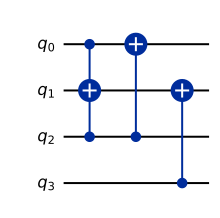

In [26]:
addmod4 = qiskit.QuantumCircuit(4)
addmod4.ccx(0, 2, 1)
addmod4.cx(2, 0)
addmod4.cx(3, 1)
addmod4.draw("mpl")